In [1]:
#importing the necessary libraries 
import pandas as pd
from plotnine import ggplot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing Recruitment Data file and seeing top 5 dataset values
df=pd.read_csv("Recruitment_Data.csv")
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [3]:
#find the shape of the data i.e. number of rows and number of columns
df.shape

(446, 4)

In [4]:
#to find the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


In [5]:
#to find the percentage of null values in descending order
print(round((100*df.isnull().mean()).sort_values(ascending=False),2))

recruiting_source     45.96
attrition              0.00
performance_rating     0.00
sales_quota_pct        0.00
dtype: float64


In [6]:
#to find description of the numerical data in the DataFrame.
df.describe()

,attrition,performance_rating,sales_quota_pct
count,446.000000,446.000000,446.000000
mean,0.213004,2.894619,1.082607
std,0.409891,0.683755,0.710042
min,0.000000,1.000000,-0.710827
25%,0.000000,2.000000,0.584444
50%,0.000000,3.000000,1.070143
75%,0.000000,3.000000,1.532488
max,1.000000,5.000000,3.666740


In [7]:
#using describe function to see details of recruiting source
df["recruiting_source"].describe()

count                241
unique                 4
top       Applied Online
freq                 130
Name: recruiting_source, dtype: object

In [8]:
df["recruiting_source"].value_counts()

Applied Online    130
Campus             56
Referral           45
Search Firm        10
Name: recruiting_source, dtype: int64

### Applied online is the most common way of recruitment.

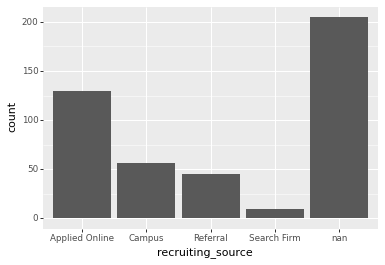

<ggplot: (140126390769)>

In [9]:
#importing ggplot to make plot for the count of recruiting_source
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_bar

ggplot(df) + aes(x="recruiting_source") + geom_bar()

In [10]:
#Printing the average Sales Number grouped by Recruiting Source
avg_sales = df.groupby("recruiting_source")["sales_quota_pct"].mean()
avg_sales

recruiting_source
Applied Online    1.058590
Campus            0.908035
Referral          1.023198
Search Firm       0.886960
Name: sales_quota_pct, dtype: float64

### After grouping by recruiting source we can see that maximum average sales is from applied online and  referral category.

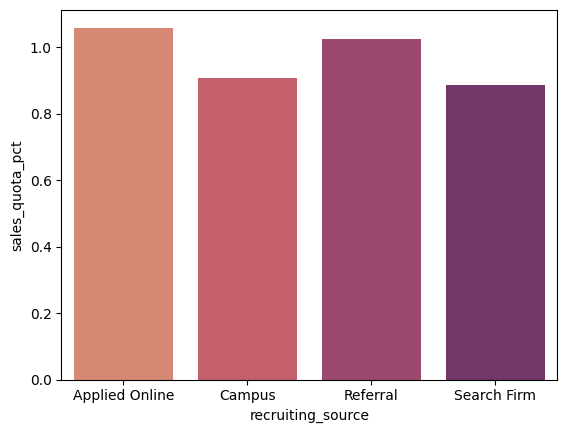

In [11]:
#Printing the graph of Sales Number grouped by Recruiting Source
sns.barplot(data=df, x='recruiting_source', y='sales_quota_pct',ci=None ,palette='flare')
plt.show()

In [12]:
#Printing the average Attrition Number grouped by Recruiting Source
avg_attrition_number = df.groupby("recruiting_source")["attrition"].mean()
avg_attrition_number

recruiting_source
Applied Online    0.246154
Campus            0.285714
Referral          0.333333
Search Firm       0.500000
Name: attrition, dtype: float64

### After grouping by recruiting source we can see that minimum attrition is done by applied online category.

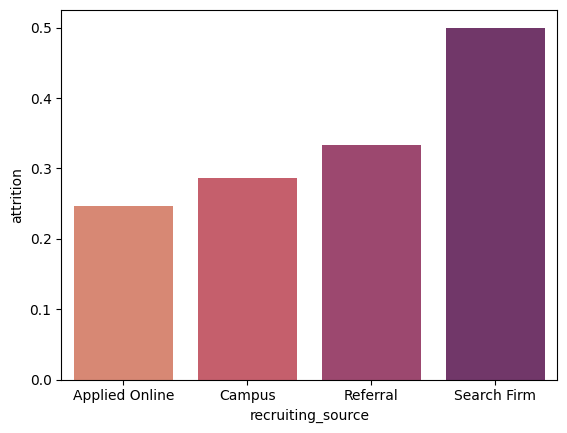

In [25]:

#Printing the graph of Attrition Number grouped by Recruiting Source
sns.barplot(data=df, x='recruiting_source', y='attrition',ci=None, palette='flare')
plt.show()

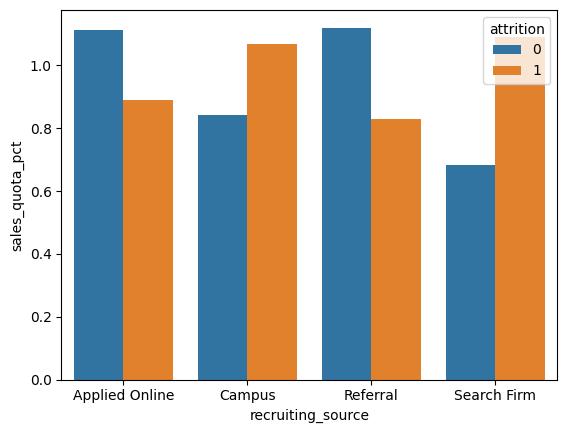

In [26]:
#bar plot to see recruiting sources that have high Sales numbers and low Attrition numbers
sns.barplot(data=df, x='recruiting_source', y='sales_quota_pct',hue="attrition",ci=None)
plt.show()

### After looking the graph we can see that applied online and referral recruiting sources have high Sales numbers and low Attrition numbers.

In [27]:
#dividing the dataset according to attrition number 0
attrition0 = df[df["attrition"]==0]
attrition0.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
1,0,3,2.394173,NaN
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online
7,0,2,1.006524,Referral
8,0,3,1.519917,Campus


In [28]:
#average sales by attrition 0
avg_sales_attrition0 = attrition0.groupby("recruiting_source")["sales_quota_pct"].mean()
avg_sales_attrition0

recruiting_source
Applied Online    1.113109
Campus            0.843527
Referral          1.120629
Search Firm       0.684434
Name: sales_quota_pct, dtype: float64

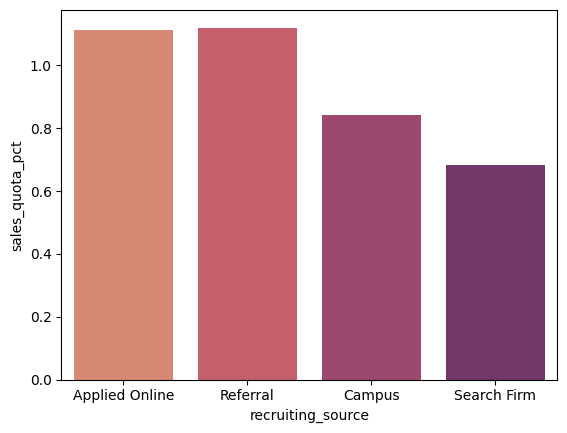

In [29]:
#avg sales by recruiting source with attrition rate 0
sns.barplot(data=attrition0, x='recruiting_source', y='sales_quota_pct',ci=None,palette='flare')
plt.show()

In [30]:
#dividing the dataset according to attrition number 1
attrition1 = df[df["attrition"]==1]
attrition1.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
2,1,2,0.497530,Campus
5,1,3,0.548123,Referral
6,1,3,0.794213,Applied Online
20,1,3,0.294166,NaN


In [31]:
#average sales by attrition 0
avg_sales_attrition1 = attrition1.groupby("recruiting_source")["sales_quota_pct"].mean()
avg_sales_attrition1

recruiting_source
Applied Online    0.891626
Campus            1.069306
Referral          0.828336
Search Firm       1.089486
Name: sales_quota_pct, dtype: float64

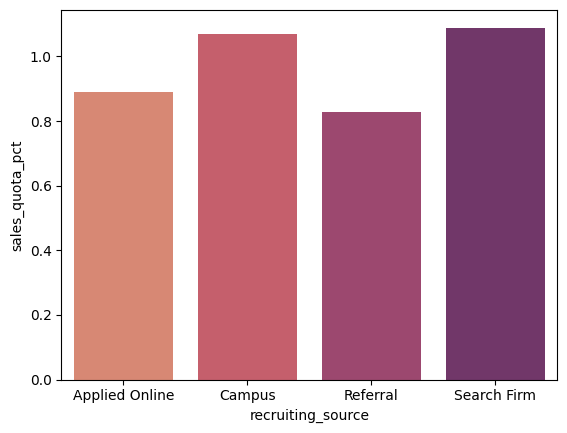

In [32]:
#avg sales by recruiting source with attrition rate 1
sns.barplot(data=attrition1, x='recruiting_source', y='sales_quota_pct',ci=None,palette='flare')
plt.show()